# **STINTSY S11 Group 1 Major Course Output**
Members:<br>
Andres, Donielle<br>
Limjoco, Jared Ethan<br>
Quinzon, Christopher Josh<br>
Uy, Shane Owen

## **Section 1: Introduction to the problem/task and dataset**

The garment industry plays a crucial role in today's industrial globalization as this labor-intesive sector relies heavily manual processes and in order to meet the global demands for clothing and textile products, the industry must ensure efficient production and delivery of the employees of garment manufacturing companies. Decision-makers or those of high positions in the garment industry makes this happen by systematically monitoring, analyzing, and predicting the productivity performance of the different teams that work within their factories. This makes it possible for companies in the industry to gain a competitive advantage in the market. <br><br>

In order to systematically monitor, analyze, and predict the productivity performance of the teams in factories, a comprehensive dataset has been built, covering important attributes related to the garment manufacturing process and the productivity of employees. This dataset serves as a valuable resource for researchers, data scientists, and industry professionals to understand the industry on a deeper level by looking at different factors contributing to the productivity of the industry. <br><br>

This project's primary objective is to predict and analyze the productivity performance of working teams in garment manufacturing companies. The target of this project is to develop models and generate insights that can predict the productivity of the teams in the garment industry based on the provided attributes. Being able to do so will greatly help decision-makers to make data-driven decision to improve the overall efficiency and competitiveness of their garment manufacturing operations

## **Section 2: Description of the dataset**

The Garment Dataset was compiled to assess the production of the garment company by analyzing the productivity of employees across various departments. The data was sourced from the data analysis of the performance records of the Garment Company, extracting information related to garment productions and the actual productivity rate compared to the targeted productivity rate. A similar study by Balla et al. (2021), utilized Machine Learning techniques to be able to predict the productivity rate of garment employees based on the Garment Dataset by analyzing and identifying the patterns that are not apparent in statistical methods. The insights from this study can potentially enhance the efficiency of garment workers, leading to a boost in the overall profitability of the clothing industry. 
<br><br>
The Garment Dataset used consists of 1197 instances and 15 features. The features include date, day, quarter, department, team (number), number of workers, number of style changes, targeted productivity, SMV, WIP, overtime, incentive, idle time, idle men, and actual productivity. Each instance in the dataset represents a specific garment team and includes values for each of the 15 features. Each feature is discussed below:

**Garments Features** <br>
- date – Date in MM-DD-YYYY
- quarter – A portion of the month. A month was divided into four quarters.
- department – Department associated with the instance.
- day – Day of the week
- team – Team number associated with the instance.
- targeted_productivity – Targeted productivity set by the authority for each team for each day.
- smv – Standard Minute Value; the allocated time for a task
- wip – Work in progress. Includes the number of unfinished items for products.
- over_time – Represents the amount of overtime by each team in minutes.
- incentive – Represents the amount of financial incentive that enables or motivates a particular course of action.
- idle_time – The amount of time when the production was interrupted due to several reasons.
- idle_men – The number of workers who were idle due to production interruption.
- no_of_style_change – Number of changes in the style of a particular product
- no_of_workers – Number of workers in each team
- actual_productivity – The actual % of productivity that was delivered by the workers. It ranges from 0-1.


## **Section 3: List of requirements**

#### **Initial Libraries** 

In [88]:
import pandas as pd
import numpy as np
from math import sqrt
from functions import compute_RMSE


#### **Data Visualization Libraries** 

In [89]:
import matplotlib.pyplot as plt
import seaborn as sns

#### **SKLearn** 

In [259]:
from sklearn import preprocessing, model_selection
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_squared_error
from sklearn import tree

## **Section 4: Data preprocessing and cleaning**
<p>
In this section, we will be performing data preprocessing and cleaning to refine the quality of the dataset and remove or fix any inconsistencies or anomalies that may compromise the garments dataset's reliability. 

First, we load the dataset and check the dataset's information such as the columns, data types, and non-null count.

In [91]:
df = pd.read_csv('garments.csv')

print(df.info())
df.head(10)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1197 entries, 0 to 1196
Data columns (total 15 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   date                   1197 non-null   object 
 1   quarter                1197 non-null   object 
 2   department             1197 non-null   object 
 3   day                    1197 non-null   object 
 4   team                   1197 non-null   int64  
 5   targeted_productivity  1197 non-null   float64
 6   smv                    1197 non-null   float64
 7   wip                    691 non-null    float64
 8   over_time              1197 non-null   int64  
 9   incentive              1197 non-null   int64  
 10  idle_time              1197 non-null   float64
 11  idle_men               1197 non-null   int64  
 12  no_of_style_change     1197 non-null   int64  
 13  no_of_workers          1197 non-null   float64
 14  actual_productivity    1197 non-null   float64
dtypes: f

,date,quarter,department,day,team,targeted_productivity,smv,wip,over_time,incentive,idle_time,idle_men,no_of_style_change,no_of_workers,actual_productivity
0,01/01/2015,Quarter1,sweing,Thursday,8,0.80,26.16,1108.0,7080,98,0.0,0,0,59.0,0.940725
1,01/01/2015,Quarter1,finishing,Thursday,1,0.75,3.94,NaN,960,0,0.0,0,0,8.0,0.886500
2,01/01/2015,Quarter1,sweing,Thursday,11,0.80,11.41,968.0,3660,50,0.0,0,0,30.5,0.800570
3,01/01/2015,Quarter1,sweing,Thursday,12,0.80,11.41,968.0,3660,50,0.0,0,0,30.5,0.800570
4,01/01/2015,Quarter1,sweing,Thursday,6,0.80,25.90,1170.0,1920,50,0.0,0,0,56.0,0.800382
5,01/01/2015,Quarter1,sweing,Thursday,7,0.80,25.90,984.0,6720,38,0.0,0,0,56.0,0.800125
6,01/01/2015,Quarter1,finishing,Thursday,2,0.75,3.94,NaN,960,0,0.0,0,0,8.0,0.755167
7,01/01/2015,Quarter1,sweing,Thursday,3,0.75,28.08,795.0,6900,45,0.0,0,0,57.5,0.753683
8,01/01/2015,Quarter1,sweing,Thursday,2,0.75,19.87,733.0,6000,34,0.0,0,0,55.0,0.753098
9,01/01/2015,Quarter1,sweing,Thursday,1,0.75,28.08,681.0,6900,45,0.0,0,0,57.5,0.750428


Copy the Dataset

In [92]:
df_copy = df

Remove Null Values

In [93]:
# remove null values
df_copy['wip'] = df_copy['wip'].fillna(0)
df_copy['wip'] = df_copy['wip'].astype(np.int64)

Check spelling and remove whitespace

In [94]:
# replace misspelled words and remove whitespace
df_copy['department'] = df_copy['department'].str.replace('sweing', 'sewing')
df_copy['department'] = df_copy['department'].str.strip()

Type Casting the `number of workers` column

In [95]:
# replace no of workers from float to int
df_copy['no_of_workers'] = df_copy['no_of_workers'].astype(np.int64)

Addressing outliers in the `actual_productivity` column by setting the values that are higher than 1.0 to 1.0 since the `target_productivity` values are 0 to 1 only.

In [96]:
# sets values of actual productivity that are higher than 1% to 1%
df_copy['actual_productivity'] = np.where(df_copy['actual_productivity'] > 1.0, 1.0, df_copy['actual_productivity'])

Dropping the `date` column because it won't be used

In [97]:
# drop date column
df_copy = df.drop(columns = ['date'])

Label Encoding the `quarter`, `department`, and `day` columns for the regression models to have a better understanding on the potential relationships and patterns in the data for predictive analysis.

In [98]:
# encode quarter into numerals 
#(0 : Quarter 1, 1: Quarter 2, 2: Quarter 3, 3: Quarter 4)
label_enc = preprocessing.LabelEncoder()
label_enc.fit_transform(df_copy['quarter'])
df_copy['quarter'] = label_enc.transform(df_copy['quarter'])

#(0 : finishing, 1: sewing)
label_enc = LabelEncoder()
label_enc.fit_transform(df_copy['department'])
df_copy['department'] = label_enc.transform(df_copy['department'])

#(0: Monday, 1: Tues, 2: Wed, 3: Thursday, 4: Friday, 5: Saturday, 6: Sunday)
df_copy['day'] = label_enc.fit_transform(df['day'])

In [99]:
df_copy.head(1000)

,quarter,department,day,team,targeted_productivity,smv,wip,over_time,incentive,idle_time,idle_men,no_of_style_change,no_of_workers,actual_productivity
0,0,1,3,8,0.80,26.16,1108,7080,98,0.0,0,0,59,0.940725
1,0,0,3,1,0.75,3.94,0,960,0,0.0,0,0,8,0.886500
2,0,1,3,11,0.80,11.41,968,3660,50,0.0,0,0,30,0.800570
3,0,1,3,12,0.80,11.41,968,3660,50,0.0,0,0,30,0.800570
4,0,1,3,6,0.80,25.90,1170,1920,50,0.0,0,0,56,0.800382
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,0,1,2,2,0.70,30.33,254,1800,0,0.0,0,0,58,0.683551
996,0,1,2,11,0.80,11.61,347,0,50,4.0,20,0,57,0.682433
997,0,0,2,4,0.60,3.94,0,960,0,0.0,0,0,8,0.673083
998,0,0,2,10,0.70,2.90,0,3360,0,0.0,0,0,8,0.664583


## **Section 5: Exploratory data analysis**

<p>
The next part of this notebook involves performing Exploratory Data Analysis (EDA) in order to investigate, understand, and visualize the garments dataset. This part will include essential information on the format and metadata of the dataset, the data types of each feature, distribution, relationships, and visualizations of the features. 

### **Format and Metadata**
Each observation/row represents a set of attributes that may contribute to the overall productivity of a single group of workers under a department for a certain day and quarter.

In [100]:
df_copy.head(10)

,quarter,department,day,team,targeted_productivity,smv,wip,over_time,incentive,idle_time,idle_men,no_of_style_change,no_of_workers,actual_productivity
0,0,1,3,8,0.80,26.16,1108,7080,98,0.0,0,0,59,0.940725
1,0,0,3,1,0.75,3.94,0,960,0,0.0,0,0,8,0.886500
2,0,1,3,11,0.80,11.41,968,3660,50,0.0,0,0,30,0.800570
3,0,1,3,12,0.80,11.41,968,3660,50,0.0,0,0,30,0.800570
4,0,1,3,6,0.80,25.90,1170,1920,50,0.0,0,0,56,0.800382
5,0,1,3,7,0.80,25.90,984,6720,38,0.0,0,0,56,0.800125
6,0,0,3,2,0.75,3.94,0,960,0,0.0,0,0,8,0.755167
7,0,1,3,3,0.75,28.08,795,6900,45,0.0,0,0,57,0.753683
8,0,1,3,2,0.75,19.87,733,6000,34,0.0,0,0,55,0.753098
9,0,1,3,1,0.75,28.08,681,6900,45,0.0,0,0,57,0.750428


###   **Data type  for Each Feature**

In [101]:
features_info = df_copy.dtypes.reset_index().rename(columns={0: 'data_type'})
features_info.columns = ['feature', 'data_type']

features_info

,feature,data_type
0,quarter,int32
1,department,int32
2,day,int32
3,team,int64
4,targeted_productivity,float64
5,smv,float64
6,wip,int64
7,over_time,int64
8,incentive,int64
9,idle_time,float64


### **Distribution of Different Features**
Showing the distribution of the features necessary for the objective of this notebook will allow us to see how the values of a certain feature are spread, arranged, or frequent, giving us a visual summary of the data and see some pattern/trend.

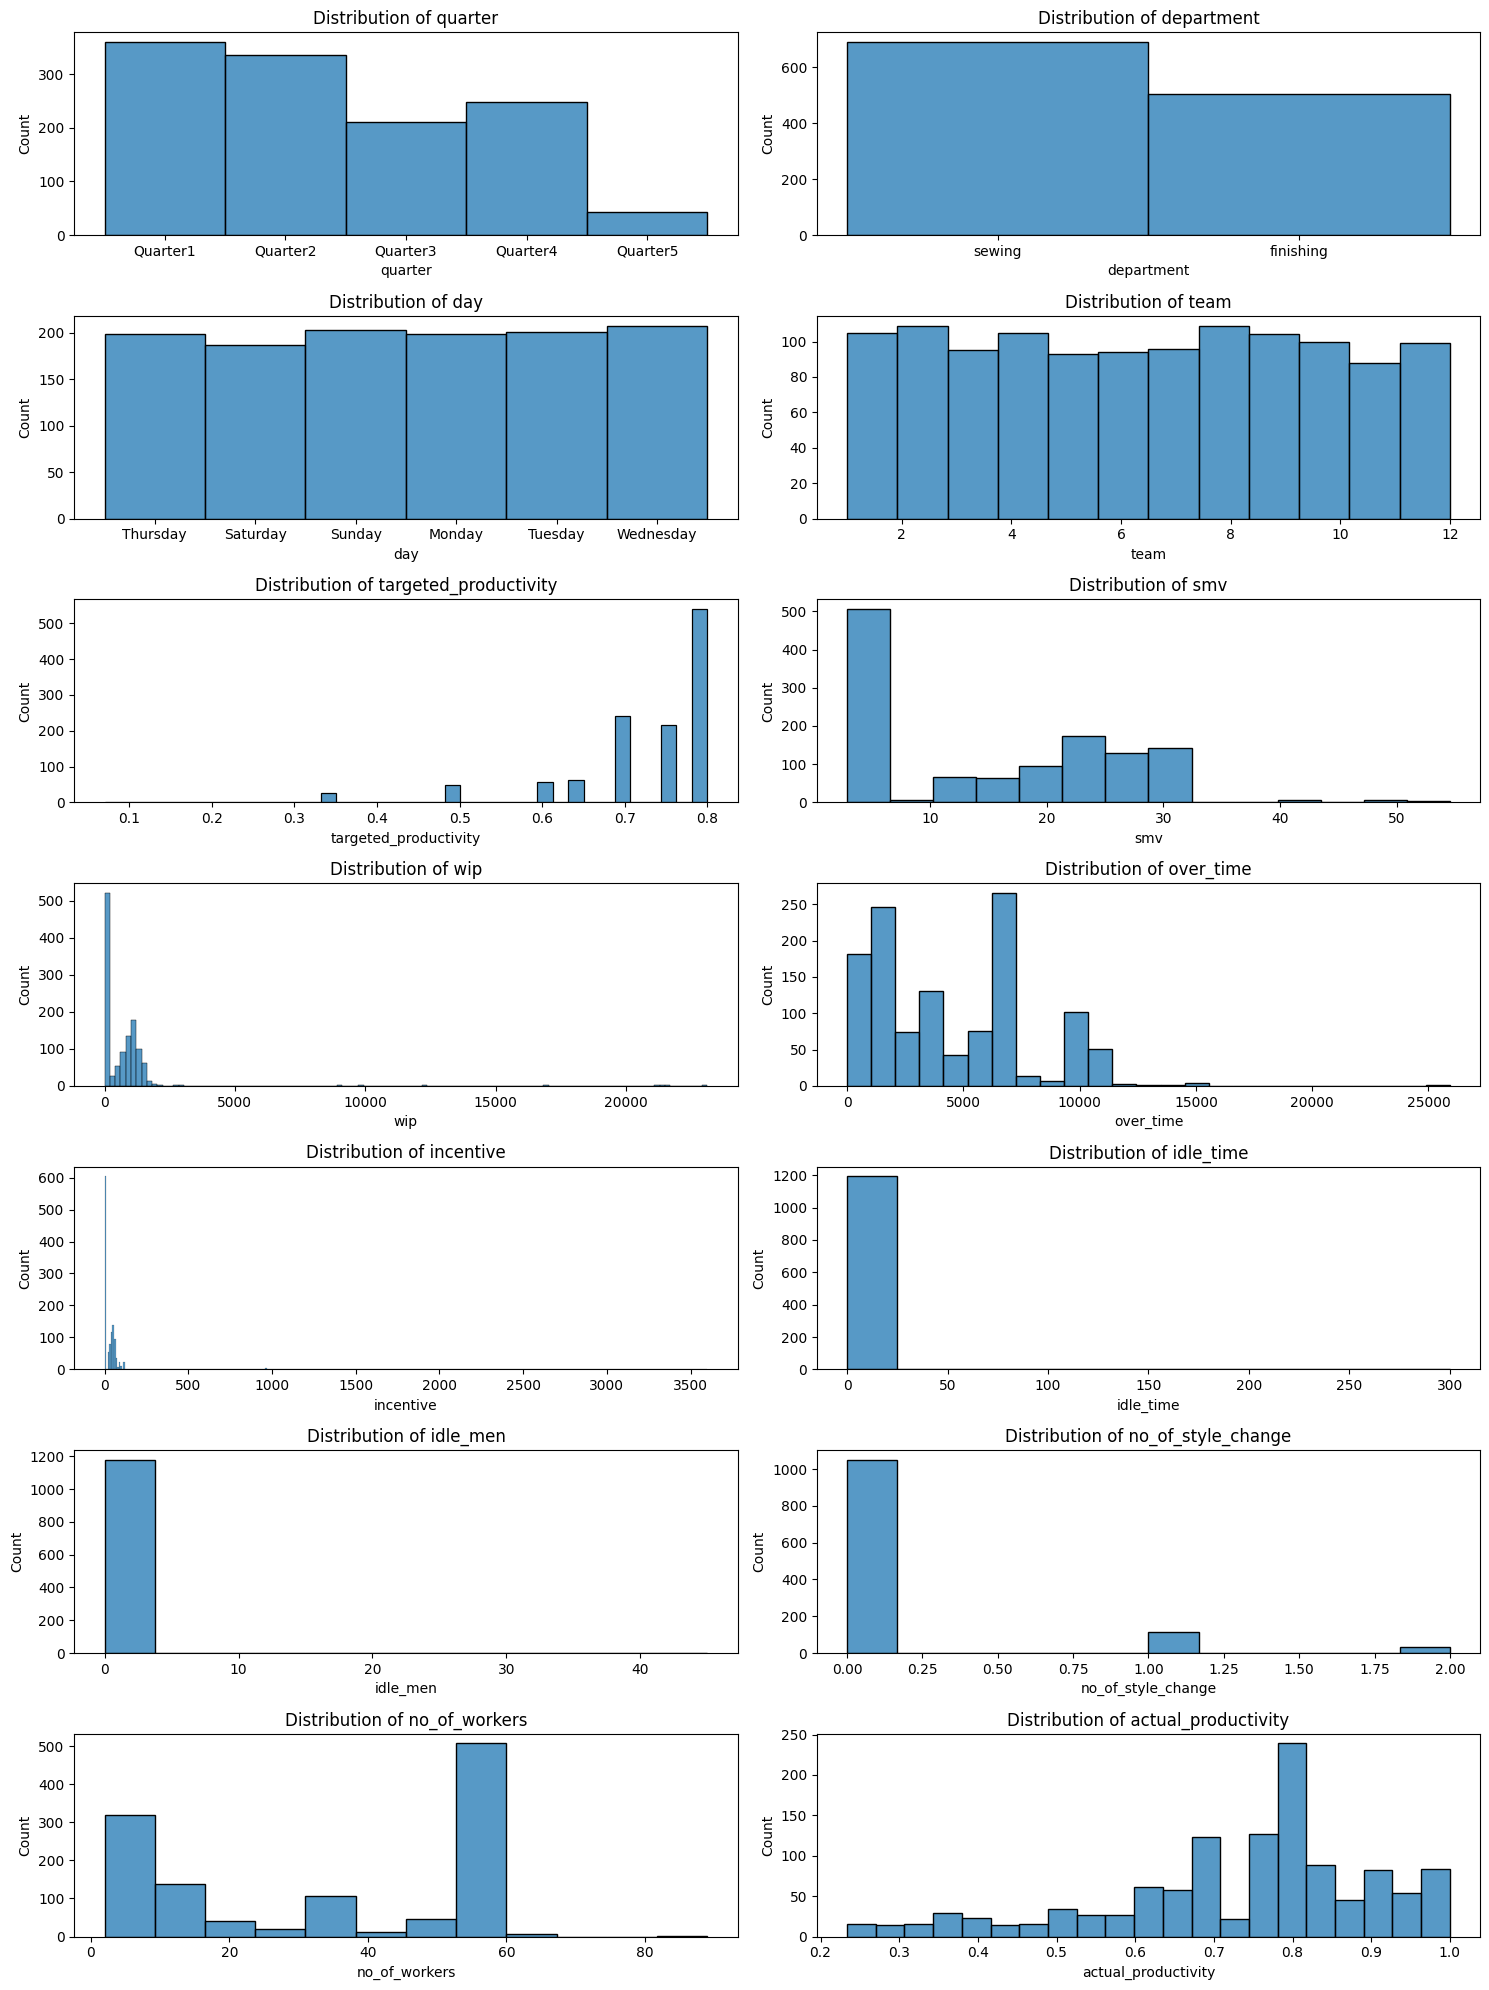

In [102]:
features = df_copy.columns.tolist()

fig, axs = plt.subplots(nrows=7, ncols=2, figsize=(15, 20))

for i, feature in enumerate(features):
    row = i // 2
    col = i % 2
    sns.histplot(df[feature], kde=False, ax=axs[row, col])
    axs[row, col].set_title(f'Distribution of {feature}')

# If the number of features is odd, we remove the last subplot
if len(features) % 2 != 0:
    fig.delaxes(axs[row, col+1])

plt.tight_layout()
plt.show()

### **Checking for Outliers** <p>
Comment: not sure if we need to remove outliers

(array([-5000.,     0.,  5000., 10000., 15000., 20000., 25000., 30000.]),
 [Text(-5000.0, 0, '−5000'),
  Text(0.0, 0, '0'),
  Text(5000.0, 0, '5000'),
  Text(10000.0, 0, '10000'),
  Text(15000.0, 0, '15000'),
  Text(20000.0, 0, '20000'),
  Text(25000.0, 0, '25000'),
  Text(30000.0, 0, '30000')])

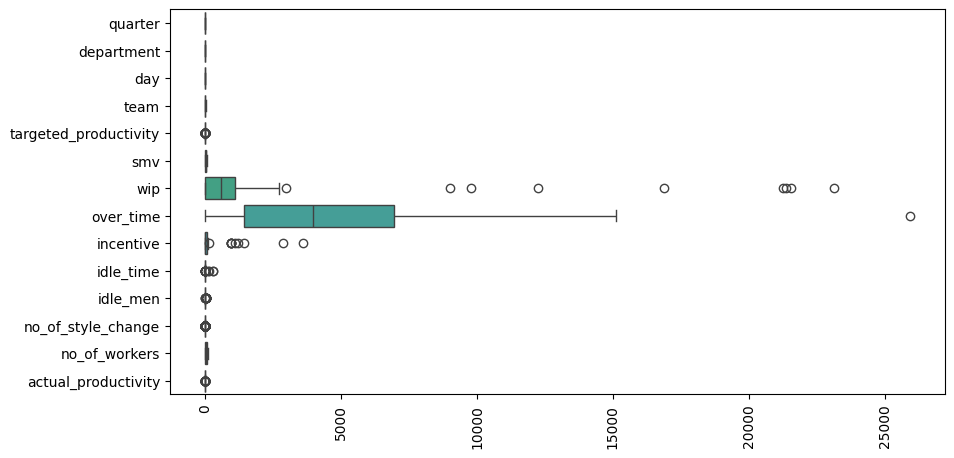

In [103]:
plt.figure(figsize=(10,5))
p = sns.boxplot(data = df_copy, orient ='h',width=0.8)
plt.xticks(rotation=90)

### **Actual and Targeted Productivity over Quarter** <p>

This graph is only a visual guide to show how the targeted productivity compares to the actual productivity.

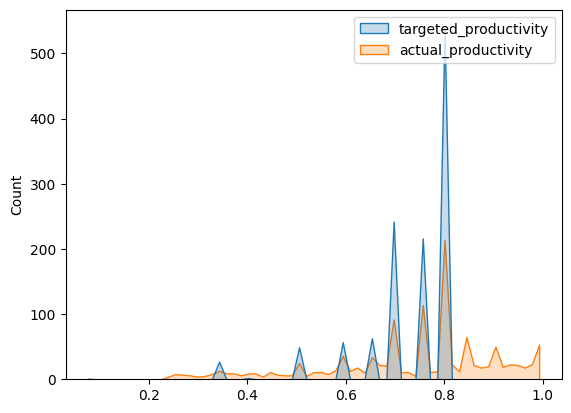

In [104]:
sns.histplot(data=df_copy[['targeted_productivity', 'actual_productivity']], element='poly')
plt.show()

### **Feature Selecting**
In this section, we will check the correlation of the features to determine which features have an contributes to the productivity value. Since all of the data in the `df_copy` are numerical, we can check its correlation with all of the features using a heatmap.

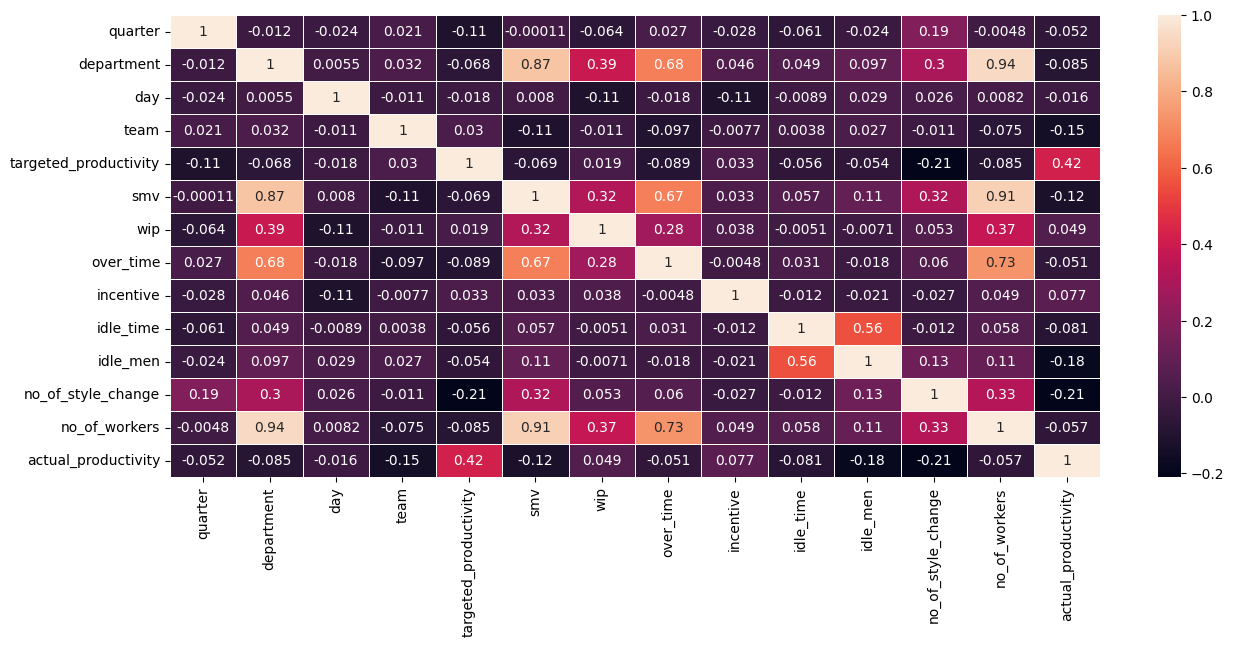

In [105]:
corrMatrix = df_copy.corr()

fig, ax = plt.subplots(figsize=(15,6)) 
sns.heatmap(corrMatrix, annot=True, linewidths=.5, ax=ax)
plt.show()

This heatmap shows that the `number_of_workers`, `department`, and `smv` are have high correlations coefficient. 

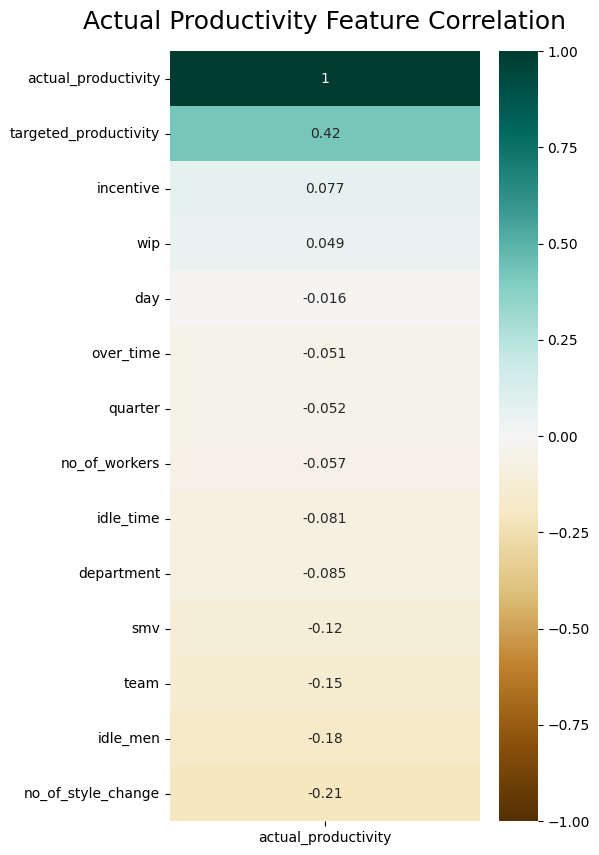

In [106]:
corrMatrix = df_copy.corr()

plt.figure(figsize=(5, 10))
heatmap = sns.heatmap(corrMatrix[['actual_productivity']].sort_values(by='actual_productivity', ascending=False), vmin=-1, vmax=1, annot=True, cmap='BrBG')
heatmap.set_title('Actual Productivity Feature Correlation', fontdict={'fontsize':18}, pad=16);

This graph shows that the `targeted_productivity`, `incentive` , and `wip`  features have a high correlation coefficient potentially signifying a relationship or dependency to the `actual_productivity`.

### **Data Splitting**

<p>

The dataset is split into 70% Training Set, and 30% Testing Set

In [107]:
from sklearn.model_selection import train_test_split

x = df_copy.drop(['actual_productivity'], axis=1)
y = df_copy.actual_productivity

# Split the data into training set (80% of the data) and temp set (20% of the data)
x_train, x_temp, y_train, y_temp = train_test_split(x, y, test_size = 0.2, random_state=42) 

# Then split the temp set into validation set (50% of the temp data) and test set (50% of the temp data)
x_val, x_test, y_val, y_test = train_test_split(x_temp, y_temp, test_size = 0.5, random_state=42)

print(x_train.shape)
print(y_train.shape)

print(x_val.shape)
print(y_val.shape)

print(x_test.shape)
print(y_test.shape)

(957, 13)
(957,)
(120, 13)
(120,)
(120, 13)
(120,)


## **Section 6: Model training**

In this section, we will be using regression models to predict the productivity of the garment workers. <br>

The models are as followed: <br>
- **Model 1:** Linear Regression <br>
- **Model 2:** Lasso Regression <br>
- **Model 3:** Ridge Regression <br>
- **Model 4:** Decision Tree Regression <br>
- **Model 5:** Random Forest Regression <br>

Use machine learning models to accomplish your chosen task for the dataset. In this section of the notebook, please take note of the following:
- The project should train and evaluate at least 3 different kinds of machine learning models.
- Each model should be appropriate in accomplishing the chosen task for the dataset. There should be a clear and correct justification on the use of each machine learning model.
- Make sure that the values of the hyperparameters of each model are mentioned. At the minimum, the optimizer, the learning rate, and the learning rate schedule should be discussed per model.
- The report should show that the models are not overfitting nor underfitting.

### **Model 1: Linear Regression** <p>

The first model that we will use is the **Linear Regression** model. This will help us understand and predict the features that affect the actual productivity of the garment workers. 

In [108]:
from sklearn.linear_model import LinearRegression

lr_model = LinearRegression(fit_intercept=True)

In [109]:
lr_model.fit(x_train, y_train)

LinearRegression()

**Predicting on Train Set**

In [110]:
lr_train_pred = lr_model.predict(x_train)

In [111]:
mae_lr_train = mean_absolute_error(y_train, lr_train_pred)
mse_lr_train = mean_squared_error(y_train, lr_train_pred)
rmse_lr_train = compute_RMSE(y_train, lr_train_pred)
r2_lr_train = r2_score(y_train, lr_train_pred)

print("LINEAR REGRESSION TRAIN SET PREDICTION")
print(f"Train Mean Absolute Error: {mae_lr_train}")
print(f"Train Mean Squared Error: {mse_lr_train}")
print(f"Train Root Mean Squared Error: {rmse_lr_train}")
print(f"Train R-squared: {r2_lr_train}")

LINEAR REGRESSION TRAIN SET PREDICTION
Train Mean Absolute Error: 0.10690442920522784
Train Mean Squared Error: 0.021673534015032005
Train Root Mean Squared Error: 0.14721933981319169
Train R-squared: 0.2986657164579225


**Predicting on Validation Set**

In [112]:
lr_val_pred = lr_model.predict(x_val)

In [113]:

mae_lr = mean_absolute_error(y_val, lr_val_pred)
mse_lr = mean_squared_error(y_val, lr_val_pred)
rmse_lr = compute_RMSE(y_val, lr_val_pred)
r2_lr = r2_score(y_val, lr_val_pred)

print("LINEAR REGRESSION VALIDATION SET PREDICTION")
print(f"LR Mean Absolute Error: {mae_lr}")
print(f"LR Mean Squared Error: {mse_lr}")
print(f"LR Root Mean Squared Error: {rmse_lr}")
print(f"LR R-squared: {r2_lr}")

LINEAR REGRESSION VALIDATION SET PREDICTION
LR Mean Absolute Error: 0.09595815539412558
LR Mean Squared Error: 0.01678438125462354
LR Root Mean Squared Error: 0.1295545493397416
LR R-squared: 0.27952064107355323


| LINEAR REGRESSION | TRAIN SET PREDICTION | VALIDATION SET PREDICTION |
|-------------------|----------------------|---------------------------|
| Mean Absolute Error: | 0.10690442920522784 | 0.09595815539412558 |
| Mean Squared Error: | 0.021673534015032005 | 0.01678438125462354 |
| Root Mean Squared Error: | 0.14721933981319169 | 0.1295545493397416 |
| R-squared: | 0.2986657164579225 | 0.27952064107355323 |

**Linear Regression Model Result:** The Linear Regression model has similar performance on both the training and validation sets, with a slightly higher error on the training set. This suggests that the model is neither significantly overfitting nor underfitting, but there might be room for improvement as the R-squared values are below 0.3 for both sets, indicating that the model explains less than 30% of the variance in the target variable.

### **Model 2: Lasso Regression** <p>

The next model that we will use is the **Lasso Regression** model. We decided to use Lasso Regression because it automatically selects and sets the features that have low coefficient to zero, meaning that into account the most significant features that highly impact the productivity of the garment workers. It will also help reduce any instances of overfitting. 

In [114]:
from sklearn.linear_model import Lasso

lasso_model = Lasso(random_state=None)

In [115]:
lasso_model.fit(x_train, y_train)

Lasso()

**Predicting on Train Set**

In [116]:
lasso_train_pred = lasso_model.predict(x_train)

In [117]:
mae_lasso_train = mean_absolute_error(y_train, lasso_train_pred)
mse_lasso_train = mean_squared_error(y_train, lasso_train_pred)
rmse_lasso_train = compute_RMSE(y_train, lasso_train_pred)
r2_lasso_train = r2_score(y_train, lasso_train_pred)

print("LASSO REGRESSION TRAIN SET PREDICTION")
print(f"Train Mean Absolute Error: {mae_lasso_train}")
print(f"Train Mean Squared Error: {mse_lasso_train}")
print(f"Train Root Mean Squared Error: {rmse_lasso_train}")
print(f"Train R-squared: {r2_lasso_train}")

LASSO REGRESSION TRAIN SET PREDICTION
Train Mean Absolute Error: 0.13648681432734266
Train Mean Squared Error: 0.030610519558537545
Train Root Mean Squared Error: 0.1749586224183808
Train R-squared: 0.009473637822605019


**Predicting on Validation Set**

In [118]:
lasso_val_pred = lasso_model.predict(x_val)

In [119]:
# LASSO
mae_lasso = mean_absolute_error(y_val, lasso_val_pred)
mse_lasso = mean_squared_error(y_val, lasso_val_pred)
rmse_lasso = compute_RMSE(y_val, lasso_val_pred)
r2_lasso = r2_score(y_val, lasso_val_pred)

print("LASSO REGRESSION VALIDATION SET PREDICTION")
print(f"Lasso Validation Mean Absolute Error: {mae_lasso}")
print(f"Lasso Validation Mean Squared Error: {mse_lasso}")
print(f"Lasso Validation Root Mean Squared Error: {rmse_lasso}")
print(f"Lasso Validation R-squared: {r2_lasso}")


LASSO REGRESSION VALIDATION SET PREDICTION
Lasso Validation Mean Absolute Error: 0.12333207892103161
Lasso Validation Mean Squared Error: 0.024259522154422414
Lasso Validation Root Mean Squared Error: 0.1557546858185089
Lasso Validation R-squared: -0.04135414374393198


| LASSO REGRESSION | TRAIN SET PREDICTION | VALIDATION SET PREDICTION |
|-------------------|----------------------|---------------------------|
| Mean Absolute Error: | 0.13648681432734266 | 0.12333207892103161 |
| Mean Squared Error: | 0.030610519558537545 | 0.024259522154422414 |
| Root Mean Squared Error: | 0.1749586224183808 | 0.1557546858185089 |
| R-squared: | 0.009473637822605019 | -0.04135414374393198 |

**Lasso Regression Model Result:** <p>
The results of the Lasso Regression model shows that in the training set, the MAE is 0.1365, the MSE is 0.0306, the RMSE is 0.1750, and the R-squared value is 0.0095. Similarly, on the validation set, the model produces a MAE of 0.1233, MSE of 0.0243, RMSE of 0.1558, and a negative R-squared value of -0.0414. <br><br> From the results, the model shows a low R-squared value with relatively high errors for the MAE, MSE, and RMSE on both the training and validation sets which means that the performance is suboptimal. This also indicates that the model is underfit, suggesting more improvements in tuning the hyperparameters of the model.  

### **Model 3: Ridge Regression**

In [120]:
from sklearn.linear_model import Ridge

ridge_model = Ridge(random_state=None)

In [121]:
ridge_model.fit(x_train, y_train)

Ridge()

**Predicting on Train Set**

In [122]:
ridge_train_pred = ridge_model.predict(x_train)

In [123]:
mae_ridge_train = mean_absolute_error(y_train, ridge_train_pred)
mse_ridge_train = mean_squared_error(y_train, ridge_train_pred)
rmse_ridge_train = compute_RMSE(y_train, ridge_train_pred)
r2_ridge_train = r2_score(y_train, ridge_train_pred)

print("RIDGE REGRESSION TRAIN SET PREDICTION")
print(f"Train Mean Absolute Error: {mae_ridge_train}")
print(f"Train Mean Squared Error: {mse_ridge_train}")
print(f"Train Root Mean Squared Error: {rmse_ridge_train}")
print(f"Train R-squared: {r2_ridge_train}")

RIDGE REGRESSION TRAIN SET PREDICTION
Train Mean Absolute Error: 0.1081048216862262
Train Mean Squared Error: 0.021720419730235405
Train Root Mean Squared Error: 0.14737849140982345
Train R-squared: 0.29714854074224417


**Predicting on Validation Set**

In [124]:
ridge_val_pred = ridge_model.predict(x_val)

In [125]:
# LASSO
mae_ridge = mean_absolute_error(y_val, ridge_val_pred)
mse_ridge= mean_squared_error(y_val, ridge_val_pred)
rmse_ridge = compute_RMSE(y_val, ridge_val_pred)
r2_ridge= r2_score(y_val, ridge_val_pred)

print("RIDGE REGRESSION VALIDATION SET PREDICTION")
print(f"Ridge Validation Mean Absolute Error: {mae_ridge}")
print(f"Ridge Validation Mean Squared Error: {mse_ridge}")
print(f"Ridge Validation Root Mean Squared Error: {rmse_ridge}")
print(f"Ridge Validation R-squared: {r2_ridge}")

RIDGE REGRESSION VALIDATION SET PREDICTION
Ridge Validation Mean Absolute Error: 0.09663200063881089
Ridge Validation Mean Squared Error: 0.016822623701554792
Ridge Validation Root Mean Squared Error: 0.12970205742992202
Ridge Validation R-squared: 0.2778790617248228


| RIDGE  REGRESSION | TRAIN SET PREDICTION | VALIDATION SET PREDICTION |
|-------------------|----------------------|---------------------------|
| Mean Absolute Error: | 0.1081048216862262 | 0.09663200063881089 |
| Mean Squared Error: | 0.021720419730235405 | 0.016822623701554792 |
| Root Mean Squared Error: | 0.14737849140982345 | 0.12970205742992202 |
| R-squared: | 0.29714854074224417 | 0.2778790617248228 |

**Ridge Regression Model Result:**
    
The Ridge Regression model demonstrates moderate performance on both the training and validation sets. In the training set, the model achieves an MAE of 0.1081, an MSE of 0.0217, a Root Mean Squared Error RMSE of 0.1474, and an R-squared value of 0.2971. Similarly, on the validation set, the Ridge Regression model shows an MAE of 0.0966, an MSE of 0.0168, an RMSE of 0.1297, and an R-squared value of 0.2779.<br><br>

The R-squared results for the model shows a performance that is fair enough to capture some of the variance in the target variable but the moderate errors suggest further improvements to lower the MAE, MSE, and RMSE values. Although we were able to show that Ridge Regression performs better than Lasso Regression based from the results, tuning the hyperparameters can still be done on the Ridge Regression Model to enhance the predictive performance. 

<font color='green'>**Model Comparison Checkpoint:**</font> In evaluating the performance of three regression models on the validation set, the linear regression and ridge regression models exhibited similar and superior performance compared to the lasso regression. The linear regression model demonstrated the lowest Mean Absolute Error (MAE) of 0.096 and Root Mean Squared Error (RMSE) of 0.130, along with a moderately higher R-squared value of 0.280, indicating a better fit to the data compared to ridge regression. Thus, among the models assessed, the linear regression model appears to be the most effective for this dataset based on its lower error metrics and higher R-squared value.

### **Model 4: Decision Tree Regressor**

In [126]:
from sklearn.tree import DecisionTreeRegressor

dt_model = DecisionTreeRegressor(max_depth=100, random_state = None)

In [127]:
# Training
dt_model.fit(x_train, y_train)

DecisionTreeRegressor(max_depth=100)

**Predicting on Train Set**

In [128]:
dt_train_pred = dt_model.predict(x_train)

In [129]:
mae_dt_train = mean_absolute_error(y_train, dt_train_pred)
mse_dt_train = mean_squared_error(y_train, dt_train_pred)
rmse_dt_train = compute_RMSE(y_train, dt_train_pred)
r2_dt_train = r2_score(y_train, dt_train_pred)

print("DECISION TREE REGRESSION TRAIN SET PREDICTION")
print(f"Train Mean Absolute Error: {mae_dt_train}")
print(f"Train Mean Squared Error: {mse_dt_train}")
print(f"Train Root Mean Squared Error: {rmse_dt_train}")
print(f"Train R-squared: {r2_dt_train}")

DECISION TREE REGRESSION TRAIN SET PREDICTION
Train Mean Absolute Error: 8.700807403018469e-18
Train Mean Squared Error: 1.6614919144055403e-33
Train Root Mean Squared Error: 4.0761402262502456e-17
Train R-squared: 1.0


**Predicting on Validation Set**

In [130]:
dt_val_pred = dt_model.predict(x_val)

In [131]:
mae_dt = mean_absolute_error(y_val, dt_val_pred)
mse_dt = mean_squared_error(y_val, dt_val_pred)
rmse_dt = compute_RMSE(y_val, dt_val_pred)
r2_dt = r2_score(y_val, dt_val_pred)

print("DECISION TREE REGRESSION VALIDATION SET PREDICTION")
print(f"Decision Tree Validation Mean Absolute Error: {mae_dt}")
print(f"Decision Tree Validation Mean Squared Error: {mse_dt}")
print(f"Decision Tree Validation Root Mean Squared Error: {rmse_dt}")
print(f"Decision Tree Validation R-squared: {r2_dt}")

DECISION TREE REGRESSION VALIDATION SET PREDICTION
Decision Tree Validation Mean Absolute Error: 0.08470072474166668
Decision Tree Validation Mean Squared Error: 0.021920571071198446
Decision Tree Validation Root Mean Squared Error: 0.14805597276435167
Decision Tree Validation R-squared: 0.059046696265426024


| DECISION TREE REGRESSION | TRAIN SET PREDICTION | VALIDATION SET PREDICTION |
|-------------------|----------------------|---------------------------|
| Mean Absolute Error: | 9.512882760633525e-18 | 0.07777630755833334 |
| Mean Squared Error: | 1.7516503903810347e-33 | 0.01857637079387745 |
| Root Mean Squared Error: | 4.1852722616109874e-17 | 0.13629516056660798 |
| R-squared: | 1.0 | 0.20259844448743214 |

**Decision Tree Regression Model Result:** <br>
The Decision Tree Regression Model achieved perfect performance on the training data, displaying zero errors and a perfect fit (R-squared of 1.0). However, when tested on the validation set, the model's accuracy decreased significantly. It exhibited higher error metrics (MAE of 0.078, RMSE of 0.136) and a lower R-squared value (0.203), indicating potential overfitting. Later on, we will be fine tuning the hyperparameters of the model to check if it still exihibits the same prediction.

### **Model 5: Random Forest Regression**

In [132]:
from sklearn.ensemble import RandomForestRegressor

rf_model = RandomForestRegressor(n_estimators = 100,  random_state = None)

In [133]:
# Training

rf_model.fit(x_train,y_train)

RandomForestRegressor()

**Predicting on Train Set**

In [134]:
rf_train_pred = rf_model.predict(x_train)

In [135]:
mae_rf_train = mean_absolute_error(y_train, rf_train_pred)
mse_rf_train = mean_squared_error(y_train, rf_train_pred)
rmse_rf_train = compute_RMSE(y_train, rf_train_pred)
r2_rf_train = r2_score(y_train, rf_train_pred)

print("RANDOM FOREST REGRESSION TRAIN SET PREDICTION")
print(f"Train Mean Absolute Error: {mae_rf_train}")
print(f"Train Mean Squared Error: {mse_rf_train}")
print(f"Train Root Mean Squared Error: {rmse_rf_train}")
print(f"Train R-squared: {r2_rf_train}")

RANDOM FOREST REGRESSION TRAIN SET PREDICTION
Train Mean Absolute Error: 0.028729002543281083
Train Mean Squared Error: 0.0022932657422974857
Train Root Mean Squared Error: 0.04788805427554439
Train R-squared: 0.9257921719074377


**Predicting on Validation Set**

In [136]:
rf_val_pred = rf_model.predict(x_val)

In [137]:
mae_rf = mean_absolute_error(y_val, ridge_val_pred)
mse_rf = mean_squared_error(y_val, ridge_val_pred)
rmse_rf = compute_RMSE(y_val, ridge_val_pred)
r2_rf = r2_score(y_val, ridge_val_pred)

print("RANDOM FOREST REGRESSION VALIDATION SET PREDICTION")
print(f"Random Forest Validation Mean Absolute Error: {mae_rf}")
print(f"Random Forest Validation Mean Squared Error: {mse_rf}")
print(f"Random Forest Validation Root Mean Squared Error: {rmse_rf}")
print(f"Random Forest Validation R-squared: {r2_rf}")

RANDOM FOREST REGRESSION VALIDATION SET PREDICTION
Random Forest Validation Mean Absolute Error: 0.09663200063881089
Random Forest Validation Mean Squared Error: 0.016822623701554792
Random Forest Validation Root Mean Squared Error: 0.12970205742992202
Random Forest Validation R-squared: 0.2778790617248228


| RANDOM FOREST REGRESSION | TRAIN SET PREDICTION | VALIDATION SET PREDICTION |
|-------------------|----------------------|---------------------------|
| Mean Absolute Error: | 0.02849880381516193 | 0.09663200063881089 |
| Mean Squared Error: | 0.002224676261081365 | 0.016822623701554792 |
| Root Mean Squared Error: | 0.04716647390977372 | 0.12970205742992202 |
| R-squared: | 0.9280116601844242 | 0.2778790617248228 |

**Random Forest Regression Model Result:** 

The random forest model shows a strong performnce on the training data with an MAE of 0.0284, an MSE of 0.00222, an RMSE 0.0471 and an R-square of 0.9281. For the validation set, the model has a moderate performance similar, with an MAE of 0.0966, an MSE of 0.0168, an RMSE 0.1297, but the R-square drops from 0.9281 (train) to 0.2779 (validation), which may indicate that the model fits less effectively on the validation set. The difference of the model's perfomance on the train and validation sets may signify the presence of overfitting, and further tuning of the hyperparameters could be considered to improve the model. 

## **Section 7: Hyperparameter tuning**

In this section, we will be fine-tuning the hyperparameters of the 5 models to check and see if we can optimize their performance further by adjusting parameters such as learning rates, regularization strengths, tree depths, or other relevant parameters, aiming to enhance their predictive capabilities and achieve better generalization on unseen data.

### **Model 1: Linear Regression**

In this model, we will use `ParameterGrid` to get the combinations of hyperparameters we will try on our model.

In [138]:
from sklearn.model_selection import ParameterGrid

We start by finding our `hyperparameters` from the list of parameters of each model.

In [139]:
lr_model.get_params()

{'copy_X': True, 'fit_intercept': True, 'n_jobs': None, 'positive': False}

In [168]:
lr_test_pred = lr_model.predict(x_val)

In [169]:
mae_lr = mean_absolute_error(y_val, lr_test_pred)
mse_lr = mean_squared_error(y_val, lr_test_pred)
rmse_lr = compute_RMSE(y_val, lr_test_pred)
r2_lr = r2_score(y_val, lr_test_pred)

print("LINEAR REGRESSION TEST SET PREDICTION")
print(f"LR Mean Absolute Error: {mae_lr}")
print(f"LR Mean Squared Error: {mse_lr}")
print(f"LR Root Mean Squared Error: {rmse_lr}")
print(f"LR R-squared: {r2_lr}")

LINEAR REGRESSION TEST SET PREDICTION
LR Mean Absolute Error: 0.09595815539412558
LR Mean Squared Error: 0.01678438125462354
LR Root Mean Squared Error: 0.1295545493397416
LR R-squared: 0.27952064107355323


The LR model apparently has no hyperparameters to tune. Instead we can tune the hyperparameters of the Ridge and Lasso models. <br><br>
References: <br>
https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html <br>
https://stackoverflow.com/questions/60454618/is-it-possible-to-tune-the-linear-regression-hyperparameter-in-sklearn <br>

### **Model 2 & 3: Lasso and Ridge Regression**

Get the parameters of both models.

In [140]:
lasso_model.get_params()

{'alpha': 1.0,
 'copy_X': True,
 'fit_intercept': True,
 'max_iter': 1000,
 'positive': False,
 'precompute': False,
 'random_state': None,
 'selection': 'cyclic',
 'tol': 0.0001,
 'warm_start': False}

In [141]:
ridge_model.get_params()

{'alpha': 1.0,
 'copy_X': True,
 'fit_intercept': True,
 'max_iter': None,
 'positive': False,
 'random_state': None,
 'solver': 'auto',
 'tol': 0.0001}

Both the `ridge` and `lasso` models have the same hyperparameter, alpha. `alpha` is a constant that multiplies the L1 term (for `ridge`) or L2 term (for `lasso`), controlling regularization strength. alpha must be a non-negative float i.e. in `[0, inf)`. Let's start by listing possible values for `alpha` which we can use as input for the `ParameterGrid`.

In [142]:
lr_parameters = {
    'alpha': [0.0001, 0.001, 0.01, 0.1, 1, 10, 100]
    }

In [143]:
list(ParameterGrid(lr_parameters))

[{'alpha': 0.0001},
 {'alpha': 0.001},
 {'alpha': 0.01},
 {'alpha': 0.1},
 {'alpha': 1},
 {'alpha': 10},
 {'alpha': 100}]

In [144]:
best_score_ridge = 1000000
for p in ParameterGrid(lr_parameters):
    print(p)
    
    ridge_model = Ridge(**p)
    
    # write code here
    ridge_model.fit(x_train, y_train)
    ridge_pred = ridge_model.predict(x_test)

    mae_ridge = mean_absolute_error(y_test, ridge_pred)
    mse_ridge  = mean_squared_error(y_test, ridge_pred)
    rmse_ridge  = compute_RMSE(y_test, ridge_pred)
    r2_ridge  = r2_score(y_test, ridge_pred)
    
    print(f"Ridge Mean Absolute Error: {mae_ridge}")
    print(f"Ridge Mean Squared Error: {mse_ridge}")
    print(f"Ridge Root Mean Squared Error: {rmse_ridge}")
    print(f"Ridge R-squared: {r2_ridge}\n")
    
    ### Change mse_ridge to the appropriate variable
    if mse_ridge < best_score_ridge:
        best_score_ridge = mse_ridge
        best_grid = p

print("Best Score: ", best_score_ridge, "%")
print("Best Grid: ", best_grid)

{'alpha': 0.0001}
Ridge Mean Absolute Error: 0.1176875064085225
Ridge Mean Squared Error: 0.02557916899287289
Ridge Root Mean Squared Error: 0.15993488985481838
Ridge R-squared: 0.10168194046091628

{'alpha': 0.001}
Ridge Mean Absolute Error: 0.11768820758022851
Ridge Mean Squared Error: 0.025579257826971857
Ridge Root Mean Squared Error: 0.1599351675741513
Ridge R-squared: 0.10167882068499912

{'alpha': 0.01}
Ridge Mean Absolute Error: 0.11769521133214188
Ridge Mean Squared Error: 0.025580150445556355
Ridge Root Mean Squared Error: 0.15993795811362715
Ridge R-squared: 0.10164747270043561

{'alpha': 0.1}
Ridge Mean Absolute Error: 0.11776446118097068
Ridge Mean Squared Error: 0.025589493889962785
Ridge Root Mean Squared Error: 0.15996716503696246
Ridge R-squared: 0.10131933909879542

{'alpha': 1}
Ridge Mean Absolute Error: 0.11850340185836705
Ridge Mean Squared Error: 0.025715738179208934
Ridge Root Mean Squared Error: 0.16036127393859445
Ridge R-squared: 0.09688574999450938

{'alpha':

The Ridge Regression model's performance was evaluated across varying alpha values, representing different levels of regularization. Lower alpha values, such as 0.0001, demonstrated better model performance, with reduced Mean Absolute Error (MAE), Mean Squared Error (MSE), and Root Mean Squared Error (RMSE), as well as higher R-squared values, suggesting a better fit to the data. As alpha increased, the regularization strength intensified, leading to increased errors and a decrease in R-squared, indicating poorer model performance. The Ridge Regression model has an optimal predictive ability at an alpha value of 0.0001, signifying the significance of minimal regularization for this specific dataset.

In [167]:
best_score_lasso = 1000000
for p in ParameterGrid(lr_parameters):
    print(p)
    
    lasso_model = Lasso(**p)
    
    # write code here
    lasso_model.fit(x_train, y_train)
    lasso_pred = lasso_model.predict(x_test)

    mae_lasso = mean_absolute_error(y_test, lasso_pred)
    mse_lasso  = mean_squared_error(y_test, lasso_pred)
    rmse_lasso  = compute_RMSE(y_test, lasso_pred)
    r2_lasso  = r2_score(y_test, lasso_pred)
    
    print(f"Lasso Mean Absolute Error: {mae_lasso}")
    print(f"Lasso Mean Squared Error: {mse_lasso}")
    print(f"Lasso Root Mean Squared Error: {rmse_lasso}")
    print(f"Lasso R-squared: {r2_lasso}\n")
    
    ### Change mse_lasso to the appropriate variable
    if mse_lasso < best_score_lasso:
        best_score_lasso = mse_lasso
        best_grid = p

print("Best Score: ", best_score_lasso, "%")
print("Best Grid: ", best_grid)

{'alpha': 0.0001}
Lasso Mean Absolute Error: 0.1177324003355898
Lasso Mean Squared Error: 0.025586776966309892
Lasso Root Mean Squared Error: 0.15995867268238348
Lasso R-squared: 0.10141475508296849

{'alpha': 0.001}
Lasso Mean Absolute Error: 0.11871546110118916
Lasso Mean Squared Error: 0.025827537468862734
Lasso Root Mean Squared Error: 0.16070948157735665
Lasso R-squared: 0.09295945665137417

{'alpha': 0.01}
Lasso Mean Absolute Error: 0.13292824793114127
Lasso Mean Squared Error: 0.03070616382750486
Lasso Root Mean Squared Error: 0.17523174320740195
Lasso R-squared: -0.07837363727879731

{'alpha': 0.1}
Lasso Mean Absolute Error: 0.12904722194744958
Lasso Mean Squared Error: 0.027881982930458602
Lasso Root Mean Squared Error: 0.16697898948807482
Lasso R-squared: 0.020809127568990782

{'alpha': 1}
Lasso Mean Absolute Error: 0.13004251181749155
Lasso Mean Squared Error: 0.02820656594420692
Lasso Root Mean Squared Error: 0.16794810491400883
Lasso R-squared: 0.009410055802782091

{'alph

Similar with the Ridge Regression Model, the lasso regression model's performance was assessed across varying alpha values, reflecting different levels of regularization. A lower alpha value of 0.0001 demonstrated superior performance, showing the reduced Mean Absolute Error (MAE), Mean Squared Error (MSE), and Root Mean Squared Error (RMSE), along with a higher R-squared value, indicating a better fit to the data. As alpha increased, representing stronger regularization, there was a gradual rise in error metrics and a decline in R-squared, signifying a decline in model performance. The Lasso Regression model exhibited optimal predictive ability at an alpha value of 0.0001, highlighting the significance of minimal regularization for achieving better predictive accuracy on this dataset.

**Lasso and Ridge Comparison Check:** Lasso Regression was more sensitive to stronger regularization, potentially leading to feature elimination and decreased model performance, while Ridge Regression exhibited a more stable performance with moderate impacts from regularization.

### **Model 4: Decision Tree Regressor**

In this model, we will use `RandomizedSearchCV` to aid in hyperparameter tuning on our Decision Tree Regressor model.

In [146]:
from sklearn.model_selection import RandomizedSearchCV

We start by finding our `hyperparameters` from the list of parameters of each model.

In [147]:
dt_model = DecisionTreeRegressor(random_state = 42)
dt_model.get_params()

{'ccp_alpha': 0.0,
 'criterion': 'squared_error',
 'max_depth': None,
 'max_features': None,
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'random_state': 42,
 'splitter': 'best'}

Let's set the following hyperparameter choices for use in the `RandomizedSearchCV` object.

In [148]:
dtr_parameters={
        "max_depth": [2, 4, 6, 10, 15, 20],
        "min_samples_split": [2, 4, 6, 10, 15, 20],
        "min_impurity_decrease": [0.001, 0.01, 0.05, 0.1, 0.3, 0.5],
        "max_leaf_nodes": [3, 5, 10, 20, 50, 100] 
}

Now we can create our `RandomizedSearchCV` object.

In [149]:
rsr = RandomizedSearchCV(dt_model, dtr_parameters, n_iter=50, cv=5, random_state=42)

Train the `rsr` model on our training data.

In [150]:
rsr.fit(x_train, y_train)

RandomizedSearchCV(cv=5, estimator=DecisionTreeRegressor(random_state=42),
                   n_iter=50,
                   param_distributions={'max_depth': [2, 4, 6, 10, 15, 20],
                                        'max_leaf_nodes': [3, 5, 10, 20, 50,
                                                           100],
                                        'min_impurity_decrease': [0.001, 0.01,
                                                                  0.05, 0.1,
                                                                  0.3, 0.5],
                                        'min_samples_split': [2, 4, 6, 10, 15,
                                                              20]},
                   random_state=42)

Let's see the results of each model (with their corresponding `hyperparameters`).

In [151]:
pd.set_option('display.max_colwidth', None)

rsr_results = pd.DataFrame(rsr.cv_results_)
rsr_results

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_min_samples_split,param_min_impurity_decrease,param_max_leaf_nodes,param_max_depth,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,0.002793,0.000399,0.002195,0.000398,15,0.1,50,6,"{'min_samples_split': 15, 'min_impurity_decrease': 0.1, 'max_leaf_nodes': 50, 'max_depth': 6}",-0.000232,-0.045272,-0.000914,-0.013410,-0.008903,-0.013746,0.016521,7
1,0.003590,0.000489,0.001794,0.000399,15,0.1,20,4,"{'min_samples_split': 15, 'min_impurity_decrease': 0.1, 'max_leaf_nodes': 20, 'max_depth': 4}",-0.000232,-0.045272,-0.000914,-0.013410,-0.008903,-0.013746,0.016521,7
2,0.002793,0.000747,0.001795,0.000398,4,0.3,10,10,"{'min_samples_split': 4, 'min_impurity_decrease': 0.3, 'max_leaf_nodes': 10, 'max_depth': 10}",-0.000232,-0.045272,-0.000914,-0.013410,-0.008903,-0.013746,0.016521,7
3,0.002591,0.001016,0.001597,0.000799,10,0.1,50,15,"{'min_samples_split': 10, 'min_impurity_decrease': 0.1, 'max_leaf_nodes': 50, 'max_depth': 15}",-0.000232,-0.045272,-0.000914,-0.013410,-0.008903,-0.013746,0.016521,7
4,0.002796,0.000753,0.002390,0.000492,2,0.01,10,20,"{'min_samples_split': 2, 'min_impurity_decrease': 0.01, 'max_leaf_nodes': 10, 'max_depth': 20}",-0.000232,-0.045272,-0.000914,-0.013410,-0.008903,-0.013746,0.016521,7
5,0.003192,0.000976,0.001595,0.000488,6,0.05,20,15,"{'min_samples_split': 6, 'min_impurity_decrease': 0.05, 'max_leaf_nodes': 20, 'max_depth': 15}",-0.000232,-0.045272,-0.000914,-0.013410,-0.008903,-0.013746,0.016521,7
6,0.003790,0.000399,0.001796,0.000399,15,0.01,5,6,"{'min_samples_split': 15, 'min_impurity_decrease': 0.01, 'max_leaf_nodes': 5, 'max_depth': 6}",-0.000232,-0.045272,-0.000914,-0.013410,-0.008903,-0.013746,0.016521,7
7,0.002992,0.000891,0.001596,0.000489,15,0.05,100,6,"{'min_samples_split': 15, 'min_impurity_decrease': 0.05, 'max_leaf_nodes': 100, 'max_depth': 6}",-0.000232,-0.045272,-0.000914,-0.013410,-0.008903,-0.013746,0.016521,7
8,0.002796,0.000731,0.002191,0.000400,6,0.3,3,15,"{'min_samples_split': 6, 'min_impurity_decrease': 0.3, 'max_leaf_nodes': 3, 'max_depth': 15}",-0.000232,-0.045272,-0.000914,-0.013410,-0.008903,-0.013746,0.016521,7
9,0.004388,0.000798,0.002003,0.000632,15,0.001,10,2,"{'min_samples_split': 15, 'min_impurity_decrease': 0.001, 'max_leaf_nodes': 10, 'max_depth': 2}",0.115297,0.191987,0.254609,0.200728,0.219330,0.196390,0.045891,5


Find the best `hyperparameters` from the `rsr` model.

In [152]:
rsr.best_params_

{'min_samples_split': 15,
 'min_impurity_decrease': 0.001,
 'max_leaf_nodes': 10,
 'max_depth': 10}

Make a new model using the best `hyperparameters`.

In [153]:
dt_model = DecisionTreeRegressor(**rsr.best_params_)

Train the new model and get the predictions.

In [154]:
dt_pred = dt_model.fit(x_train, y_train).predict(x_test)

In [155]:
mae_dt = mean_absolute_error(y_test, dt_pred)
mse_dt = mean_squared_error(y_test, dt_pred)
rmse_dt = compute_RMSE(y_test, dt_pred)
r2_dt = r2_score(y_test, dt_pred)


print(f"DT Mean Absolute Error: {mae_dt}")
print(f"DT Mean Squared Error: {mse_dt}")
print(f"DT Root Mean Squared Error: {rmse_dt}")
print(f"DT R-squared: {r2_dt}")

DT Mean Absolute Error: 0.10207226385195782
DT Mean Squared Error: 0.02043995062244807
DT Root Mean Squared Error: 0.1429683553183993
DT R-squared: 0.2821667980946405


Now, let's compare the results before and after hyperparameter tuning. The increase in MAE suggests that the tuned Decision Tree model performed less well on average, which is a negative outcome. However, the decrease in MSE, RMSE, and the increase in R-squared indicate that the model's generalization to unseen data likely improved after hyperparameter tuning. The tuned model might be better capturing the underlying patterns and exhibiting lower overall variance.

### **Model 5: Random Forest Regression**

To tune the hyperparameters for a random forest model, we will be using the grid search tenchnique using GridSearchCV from scikit learn. We will define a grid of hyperparameters and let the GridSearchCV perform cross-validated grid search to identify the best set of hyperparameters based on the negative MSE. After getting the best set of hyperparameters, we then use it to train the model again and evaluate using the validation set.

Let's create a new random forest regressor object.

In [156]:
rf_model = RandomForestRegressor(random_state=None)

Define the hyperparameter grid to search.

In [157]:
param_grid = {
    'n_estimators': [50, 100, 150],          
    'max_depth': [None, 10, 20, 30],         
    'min_samples_split': [2, 5, 10],         
    'min_samples_leaf': [1, 2, 4]            
}

Let's make the `GridSearchCV` object and search for the best set of parameters.

In [158]:
# create a GridSearchCV
grid_search = GridSearchCV(estimator=rf_model, param_grid=param_grid, scoring='neg_mean_squared_error', cv=5, n_jobs=-1)

In [159]:
# train the model
grid_search.fit(x_train, y_train)

GridSearchCV(cv=5, estimator=RandomForestRegressor(), n_jobs=-1,
             param_grid={'max_depth': [None, 10, 20, 30],
                         'min_samples_leaf': [1, 2, 4],
                         'min_samples_split': [2, 5, 10],
                         'n_estimators': [50, 100, 150]},
             scoring='neg_mean_squared_error')

Show the best set of hyperparameters from the `GridSearchCV`.

In [160]:
# get the best set of hyperparameters
best_params = grid_search.best_params_
best_params

{'max_depth': 10,
 'min_samples_leaf': 1,
 'min_samples_split': 10,
 'n_estimators': 50}

Let's make a new Random Forest Regressor using these `hyperparameters` and train it as well. 

In [161]:
# Use the best hyperparameters to create the final model
best_rf_model = RandomForestRegressor(**best_params, random_state=None)

In [162]:
# train the model with the best hyperparameters
best_rf_model.fit(x_train, y_train)

RandomForestRegressor(max_depth=10, min_samples_split=10, n_estimators=50)

Now to predict it on the validation set and see the results.

In [163]:
# Predict on the validation set
rf_val_pred_tuned = best_rf_model.predict(x_val)

In [164]:
# Evaluate the tuned model
tuned_mse = mean_squared_error(y_val, rf_val_pred_tuned)
tuned_mae = mean_absolute_error(y_val, rf_val_pred_tuned)
tuned_rmse = np.sqrt(tuned_mse)
tuned_r2 = r2_score(y_val, rf_val_pred_tuned)

Lets print out the values we just computed for:

In [165]:
# best hyperparameters and evaluation metrics
print("Best Hyperparameters:", best_params)
print("Tuned Random Forest Validation Mean Absolute Error:", tuned_mae)
print("Tuned Random Forest Validation Mean Squared Error:", tuned_mse)
print("Tuned Random Forest Validation Root Mean Squared Error:", tuned_rmse)
print("Tuned Random Forest Validation R-squared:", tuned_r2)

Best Hyperparameters: {'max_depth': 10, 'min_samples_leaf': 1, 'min_samples_split': 10, 'n_estimators': 50}
Tuned Random Forest Validation Mean Absolute Error: 0.07292866565844759
Tuned Random Forest Validation Mean Squared Error: 0.012000979548710194
Tuned Random Forest Validation Root Mean Squared Error: 0.10954898241750215
Tuned Random Forest Validation R-squared: 0.4848509503820816


From the results of the hyperparameter tuning process, we can see that the model has improved its perforamce on the validation set. the MAE, MSE, RMSE, was decreased while the R-square value increased, indicating that the model captures a larger portion of the variance in the target variable on the validation set.

We can now check if the model will be able to generalize on new data by predicting the test set

In [166]:
rf_test_pred_tuned = best_rf_model.predict(x_test)

test_mae = mean_absolute_error(y_test, rf_test_pred_tuned)
test_mse = mean_squared_error(y_test, rf_test_pred_tuned)
test_rmse = np.sqrt(test_mse)
test_r2 = r2_score(y_test, rf_test_pred_tuned)

# Print the test set evaluation metrics
print("Tuned Random Forest Test Mean Absolute Error:", test_mae)
print("Tuned Random Forest Test Mean Squared Error:", test_mse)
print("Tuned Random Forest Test Root Mean Squared Error:", test_rmse)
print("Tuned Random Forest Test R-squared:", test_r2)

Tuned Random Forest Test Mean Absolute Error: 0.06951715834017401
Tuned Random Forest Test Mean Squared Error: 0.012485714221889233
Tuned Random Forest Test Root Mean Squared Error: 0.11173949266883769
Tuned Random Forest Test R-squared: 0.5615126286982888


The results of applying the tuned random forest on the test set, we can say that the model was able to show the improvements after tuning the hyperparameters. On the test set, the errors became lower, the R-square increased, and the consistency of the model is shown as it was able to generalize from the train and validation sets to the test set.

## **Section 8: Model selection**

Present a summary of all model configurations. Include each algorithm and the best set of values for its hyperparameters. Identify the best model configuration and discuss its advantage over other configurations.

| Models     | Mean Absolute Error | Mean Squared Error | Root Mean Squared Error | R-squared | 
|------------|---------------------|--------------------|-------------------------|-----------|
| Linear Regression        | 0.09595815539412558 |0.01678438125462354|0.1295545493397416|0.27952064107355323| 
| Lasso Regression         | 0.1177324003355898 | 0.025586776966309892 | 0.15995867268238348  |0.10141475508296849| 
| Ridge Regression         | 0.1176875064085225 | 0.02557916899287289 | 0.15993488985481838 | 0.10168194046091628| 
| Decision Tree Regressor  | 0.10207226385195782 | 0.02043995062244807 | 0.1429683553183993 |0.2821667980946405| 
| Random Forest Regressor  | 0.06951715834017401 | 0.012485714221889233 | 0.11173949266883769 |0.5615126286982888| 

Among the five models evaluated on the test set, the Tuned Random Forest Regression displayed the best predictive performance. It achieved the lowest Mean Absolute Error (MAE) of 0.070, Mean Squared Error (MSE) of 0.012, and Root Mean Squared Error (RMSE) of 0.112, accompanied by the highest R-squared value of 0.562. This indicates that the Tuned Random Forest model outperformed the Decision Tree, Lasso Regression, Ridge Regression, and Linear Regression models in accurately predicting the target variable on unseen data.

## **Section 9: Insights and conclusions**

Clearly state your insights and conclusions from training a model on the data. Why did some models produce better results? Summarize your conclusions to explain the performance of the models. Discuss recommendations to improve the performance of the model.

Predicting the Productivity of the Garment Workers based on the given features allowed us to determine which model/s was able to predict the actual productivity count. During the Model Training, we were able to distinguish which models we can use. We decided to use only Regression Models since the origin of the dataset suggests that features can be used for regression purposes to determine the actual productivity count. The regression models were chosen because they are best suited for predicting a continuous outcome variable (such as the productivity) from one or more predictor variables. We decided to use Linear, Lasso, and Ridge Regression as our first 3 models because we want to understand the relationships between the various features provided and the actual productivity count of the garment workers. Specifically, Linear Regression serves as a fundamental method to establish a baseline predictive model. Moreover, we integrated Lasso and Ridge Regression into our selection due to their regularization capabilities, addressing potential issues of multicollinearity and overfitting while allowing us to measure the impact of different features on the productivity count. The Decision Trees and Random Forest were used to complement our analysis by exploring potential non-linear relationships and interactions between features that might influence the productivity of garment workers. Decision Trees and Random Forest models were incorporated to capture complex patterns and interactions within the dataset that might not be easily discernible with linear models alone. Random Forest combines multiple trees to improve predictive accuracy and generalize well to new data. By employing these tree-based models, we were able to capture nuanced relationships and interactions within the data, thereby enhancing our understanding of how various factors impact garment workers' productivity. <p> <p>

The variation in performance among these models on the test set is due to their unique approaches. Decision Trees can overfit, while Lasso and Ridge Regression, despite regularization, might not suit the data well. Random Forest, an ensemble of trees, excels by capturing complex relationships while averting overfitting. Linear Regression, though simple, might struggle with the data's complexity. The Random Forest model outperformed others, likely due to its capacity to handle complexity and generalize better to predict productivity count.

## **Section 10: References**

https://towardsdatascience.com/hyperparameter-tuning-the-random-forest-in-python-using-scikit-learn-28d2aa77dd74